TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

QUESTION 1.1 — STATISTIQUES DESCRIPTIVES

📊 PORTEFEUILLE CONSERVATIVE (A)
	• Rendement mensuel moyen : 0.94%
	• Écart-type mensuel : 0.48%
	• Médiane : 1.00%
	• Rendement annualisé : 11.85%
	• Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
	• Rendement mensuel moyen : 2.89%
	• Écart-type mensuel : 4.45%
	• Médiane : 4.70%
	• Rendement annualisé : 40.79%
	• Volatilité annualisée : 15.41%

QUESTION 1.2 — VISUALISATION DISTRIBUTIONS


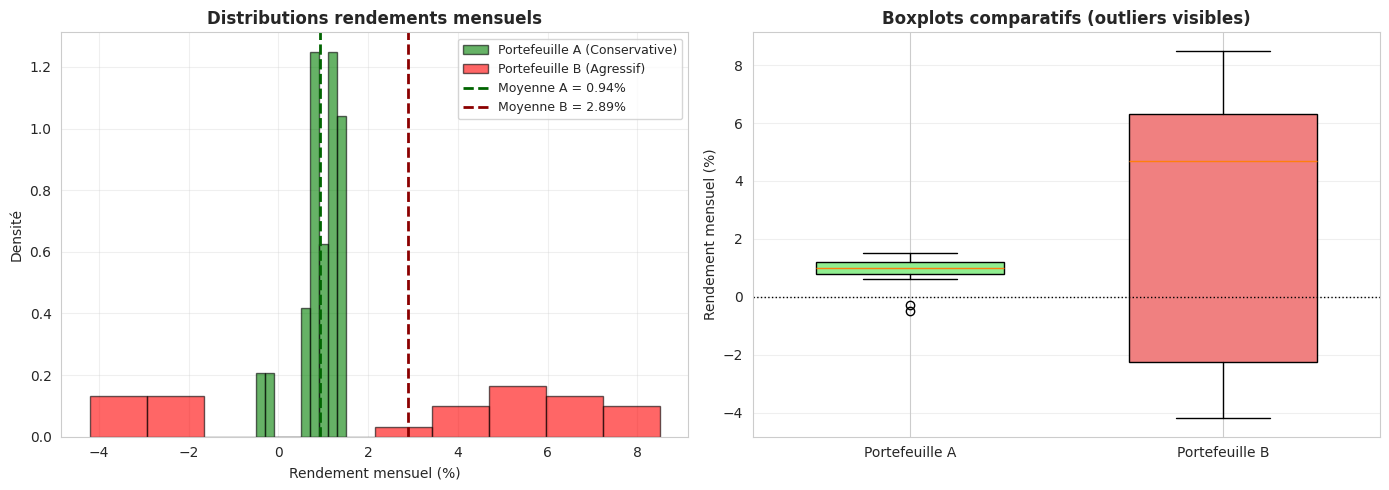

✓ Graphiques générés (histogrammes + boxplots)

QUESTION 1.3 — VALUE AT RISK (VaR 95%)

💰 CAPITAL INVESTI : €500,000
🚨 PERTE MAX TOLÉRÉE CLIENT : €50,000 (-10%)

📉 PORTEFEUILLE A (Conservative)
	• VaR 95% mensuelle : 0.15% → €763
	• VaR 95% annuelle : 9.13% → €45,649

📉 PORTEFEUILLE B (Agressif)
	• VaR 95% mensuelle : -4.42% → €-22,118
	• VaR 95% annuelle : 15.45% → €77,231

✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :
	• Portefeuille A : ✓ RESPECTÉE (45,649 € vs -50,000 €)
	• Portefeuille B : ✗ NON RESPECTÉE (77,231 € vs -50,000 €)

🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)

	PORTEFEUILLE A :
	• Statistique Shapiro : 0.8032
	• P-value : 0.0003
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

	PORTEFEUILLE B :
	• Statistique Shapiro : 0.8366
	• P-value : 0.0012
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT

📊 RATIO SHARPE (Rendement ajusté risque)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

# Paramètres
capital = 500000  # € à investir
perte_max_toleree = 50000  # € (10% capital)
taux_sans_risque = 3.0  # % annuel

# ============================================================================ # QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.1 — STATISTIQUES DESCRIPTIVES")
print("="*80)

def calculer_stats_portefeuille(rendements, nom):
    """
    Calcule statistiques descriptives portefeuille

    Parameters:
    ----------
    rendements : np.array
        Rendements mensuels (%)
    nom : str
        Nom portefeuille

    Returns:
    -------
    dict :
        Statistiques calculées
    """
    # a) Moyenne mensuelle
    moyenne_mensuelle = np.mean(rendements)

    # b) Écart-type mensuel
    ecart_type_mensuel = np.std(rendements, ddof=1)  # ddof=1 pour échantillon

    # c) Médiane
    mediane = np.median(rendements)

    # d) Rendement annualisé (capitalisation composée)
    # Formule : (1 + r_mensuel/100)^12 - 1
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100

    # e) Volatilité annualisée
    # Formule : σ_annuel = σ_mensuel × √12
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    stats = {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }

    return stats

# Calcul stats pour les deux portefeuilles
stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

# Affichage résultats
for stats_item in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {stats_item['nom']}")
    print(f"\t• Rendement mensuel moyen : {stats_item['moyenne_mensuelle']:.2f}%")
    print(f"\t• Écart-type mensuel : {stats_item['ecart_type_mensuel']:.2f}%")
    print(f"\t• Médiane : {stats_item['mediane']:.2f}%")
    print(f"\t• Rendement annualisé : {stats_item['rendement_annuel']:.2f}%")
    print(f"\t• Volatilité annualisée : {stats_item['volatilite_annuelle']:.2f}%")

# ============================================================================ # QUESTION 1.2 — VISUALISATION DISTRIBUTIONS
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.2 — VISUALISATION DISTRIBUTIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1 : Histogrammes superposés
ax1 = axes[0]
ax1.hist(rendements_A, bins=10, alpha=0.6, color='green', edgecolor='black', label='Portefeuille A (Conservative)', density=True)
ax1.hist(rendements_B, bins=10, alpha=0.6, color='red', edgecolor='black', label='Portefeuille B (Agressif)', density=True)

# Lignes moyennes
ax1.axvline(stats_A['moyenne_mensuelle'], color='darkgreen', linestyle='--', linewidth=2, label=f'Moyenne A = {stats_A["moyenne_mensuelle"]:.2f}%')
ax1.axvline(stats_B['moyenne_mensuelle'], color='darkred', linestyle='--', linewidth=2, label=f'Moyenne B = {stats_B["moyenne_mensuelle"]:.2f}%')

ax1.set_title('Distributions rendements mensuels', fontsize=12, fontweight='bold')
ax1.set_xlabel('Rendement mensuel (%)')
ax1.set_ylabel('Densité')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2 : Boxplots comparatifs
ax2 = axes[1]
data_boxplot = [rendements_A, rendements_B]
bp = ax2.boxplot(data_boxplot, tick_labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True, widths=0.6)

# Couleurs boxplots
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Boxplots comparatifs (outliers visibles)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rendement mensuel (%)')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(0, color='black', linestyle=':', linewidth=1)

plt.tight_layout()
plt.show()
print("✓ Graphiques générés (histogrammes + boxplots)")

# ============================================================================ # QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.3 — VALUE AT RISK (VaR 95%)")
print("="*80)

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    """
    Calcule VaR paramétrique mensuelle et annuelle

    Parameters:
    ----------
    stats_dict : dict
        Statistiques portefeuille (from calculer_stats_portefeuille)
    capital : float
        Capital investi (€)
    alpha : float
        Niveau risque (0.05 pour VaR 95%)

    Returns:
    -------
    dict :
        VaR calculées
    """
    # Quantile normal standard pour alpha=5% (queue gauche)
    z_alpha = stats.norm.ppf(alpha)  # ≈ -1.645

    # a) VaR mensuelle (%)
    var_mensuelle_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']

    # b) VaR annuelle (%)
    # Méthode : Utiliser rendement et volatilité annualisés
    var_annuelle_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    # c) VaR en perte monétaire (€)
    var_mensuelle_euros = capital * (var_mensuelle_pct / 100)
    var_annuelle_euros = capital * (var_annuelle_pct / 100)

    var_results = {
        'var_mensuelle_pct': var_mensuelle_pct,
        'var_annuelle_pct': var_annuelle_pct,
        'var_mensuelle_euros': var_mensuelle_euros,
        'var_annuelle_euros': var_annuelle_euros
    }

    return var_results

# Calcul VaR pour les deux portefeuilles
var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

# Affichage résultats
print(f"\n💰 CAPITAL INVESTI : €{capital:,.0f}")
print(f"🚨 PERTE MAX TOLÉRÉE CLIENT : €{perte_max_toleree:,.0f} (-{perte_max_toleree/capital*100:.0f}%)")
print(f"\n📉 PORTEFEUILLE A (Conservative)")
print(f"\t• VaR 95% mensuelle : {var_A['var_mensuelle_pct']:.2f}% → €{var_A['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_A['var_annuelle_pct']:.2f}% → €{var_A['var_annuelle_euros']:,.0f}")
print(f"\n📉 PORTEFEUILLE B (Agressif)")
print(f"\t• VaR 95% mensuelle : {var_B['var_mensuelle_pct']:.2f}% → €{var_B['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_B['var_annuelle_pct']:.2f}% → €{var_B['var_annuelle_euros']:,.0f}")

# Vérification contrainte client
print(f"\n✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :")
contrainte_A = abs(var_A['var_annuelle_euros']) <= perte_max_toleree
contrainte_B = abs(var_B['var_annuelle_euros']) <= perte_max_toleree
print(f"\t• Portefeuille A : {'✓ RESPECTÉE' if contrainte_A else '✗ NON RESPECTÉE'} "
      f"({var_A['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")
print(f"\t• Portefeuille B : {'✓ RESPECTÉE' if contrainte_B else '✗ NON RESPECTÉE'} "
      f"({var_B['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")

# d) Test normalité (Shapiro-Wilk)
print(f"\n🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)")

stat_A, p_value_A = stats.shapiro(rendements_A)
stat_B, p_value_B = stats.shapiro(rendements_B)

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Statistique Shapiro : {stat_A:.4f}")
print(f"\t• P-value : {p_value_A:.4f}")
if p_value_A > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Statistique Shapiro : {stat_B:.4f}")
print(f"\t• P-value : {p_value_B:.4f}")
if p_value_B > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

# ============================================================================ # QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT")
print("="*80)

# a) Calcul Ratio Sharpe
sharpe_A = (stats_A['rendement_annuel'] - taux_sans_risque) / stats_A['volatilite_annuelle']
sharpe_B = (stats_B['rendement_annuel'] - taux_sans_risque) / stats_B['volatilite_annuelle']
print(f"\n📊 RATIO SHARPE (Rendement ajusté risque)")

print(f"\tFormule : (Rendement annuel - Taux sans risque) / Volatilité annuelle")
print(f"\tTaux sans risque (rf) : {taux_sans_risque}%")

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Sharpe = ({stats_A['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_A['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_A:.3f}")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Sharpe = ({stats_B['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_B['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_B:.3f}")

# Interprétation Sharpe
print(f"\n\tINTERPRÉTATION :")
if sharpe_A > 1:
    print(f"\t✓ Portefeuille A : Excellent (Sharpe > 1)")
elif sharpe_A > 0.5:
    print(f"\t✓ Portefeuille A : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille A : Faible (Sharpe < 0.5)")

if sharpe_B > 1:
    print(f"\t✓ Portefeuille B : Excellent (Sharpe > 1)")
elif sharpe_B > 0.5:
    print(f"\t✓ Portefeuille B : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille B : Faible (Sharpe < 0.5)")

# b) RECOMMANDATION CLIENT
print(f"\n" + "="*80)
print("🎯 RECOMMANDATION CLIENT FINALE")
print("="*80)
print(f"\n📋 CRITÈRES DÉCISION :")
print(f"\t1. VaR 95% annuelle ≤ -€50,000 (contrainte risque)")
print(f"\t2. Ratio Sharpe maximum (efficience)")
print(f"\t3. Normalité rendements (fiabilité VaR)")
print(f"\n📊 TABLEAU COMPARATIF :")
print(f"\n{'Critère':<30} {'Portefeuille A':<20} {'Portefeuille B':<20}")
print(f"{'-'*70}")
print(f"{('Rendement annuel'):<30} {stats_A['rendement_annuel']:>8.2f}% {stats_B['rendement_annuel']:>28.2f}%")
print(f"{('Volatilité annuelle'):<30} {stats_A['volatilite_annuelle']:>8.2f}% {stats_B['volatilite_annuelle']:>28.2f}%")
print(f"{('VaR 95% (€)'):<30} {var_A['var_annuelle_euros']:>13,.0f} € {var_B['var_annuelle_euros']:>22,.0f} €")
print(f"{('Contrainte respectée'):<30} {'✓ OUI' if contrainte_A else '✗ NON':<20} {'✓ OUI' if contrainte_B else '✗ NON':<20}")
print(f"{('Ratio Sharpe'):<30} {sharpe_A:>13.3f} {sharpe_B:>27.3f}")
print(f"{('Normalité (p-value)'):<30} {p_value_A:>13.3f} {p_value_B:>27.3f}")
print(f"\n💡 RECOMMANDATION FINALE :")

# Logique décision
if not contrainte_A and not contrainte_B:
    print(f"\t❌ AUCUN PORTEFEUILLE ne respecte contrainte risque client.")
    print(f"\t→ Réduire allocation ou revoir tolérance perte.")
elif contrainte_A and not contrainte_B:
    print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Sharpe {sharpe_A:.2f} correct, volatilité maîtrisée {stats_A['volatilite_annuelle']:.1f}%")
elif not contrainte_A and contrainte_B:
    print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Rendement élevé {stats_B['rendement_annuel']:.1f}% mais volatilité importante {stats_B['volatilite_annuelle']:.1f}%")
else:  # Les deux respectent contrainte
    if sharpe_A > sharpe_B:
        print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_A:.2f} vs {sharpe_B:.2f})")
        print(f"\t→ Profil risque/rendement optimal selon contrainte client")
    else:
        print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_B:.2f} vs {sharpe_A:.2f})")
        print(f"\t→ Rendement supérieur ({stats_B['rendement_annuel']:.1f}% vs {stats_A['rendement_annuel']:.1f}%)")

print(f"\n\tJUSTIFICATION :")
print(f"\t• VaR paramétrique fiable si normalité vérifiée (test Shapiro p > 0.05)")
print(f"\t• Sharpe mesure efficience : unités rendement excédentaire par unité risque")
print(f"\t• Client conservateur → Privilégier A (stabilité)")
print(f"\t• Client tolérant volatilité → Envisager B si Sharpe meilleur et VaR OK")
print(f"\n✓ FIN PARTIE 1\n")